In [1]:
import os
from glob import glob
from data_analysis.utils import Mine

In [2]:
input_dir = r"E:\takadamalab\sleep_study\logs\ouput_metrics_from_ss"
filelist = glob(os.path.join(input_dir, "*"))

In [31]:
# ファイルの読み込みと被験者名の紐づけ
import pandas as pd
df_d = {}
for file in filelist:
    name = os.path.split(file)[1].split(".")[0]
    tmp_d = {name: pd.read_csv(file, index_col=0)}
    df_d.update(tmp_d)

In [32]:
# metrics 3 type: precision, recall, f-m
metrics = ("precision", "recall", "f1-score")
# methods 7 type: cnn_attn, cnn_no_attn, aecnn, ecnn, ccnn, eenn, denn
methods = ("cnn_attn", "cnn_no_attn", "aecnn", "ecnn", "ccnn", "eenn", "denn")
# sleep stage 5 type: nr34, nr2, nr1, rem, wake
ss_acc = ("nr34", "nr2", "nr1", "rem", "wake", "accuracy")
metrics_method_key = [i+"_"+j for i in metrics for j in methods]

In [33]:
# H_Liで実験
# df_d["140703_Li"].loc["precision_cnn_attn", "nr34"]
df_d["140703_Li"].loc["precision_cnn_attn", "nr34"]

0.0

In [34]:
df_d["140703_Li"].index

Index(['precision_cnn_attn', 'recall_cnn_attn', 'f1-score_cnn_attn',
       'support_cnn_attn', 'precision_cnn_no_attn', 'recall_cnn_no_attn',
       'f1-score_cnn_no_attn', 'support_cnn_no_attn', 'precision_enn',
       'recall_enn', 'f1-score_enn', 'support_enn', 'precision_aecnn',
       'recall_aecnn', 'f1-score_aecnn', 'support_aecnn', 'precision_ecnn',
       'recall_ecnn', 'f1-score_ecnn', 'support_ecnn', 'precision_ccnn',
       'recall_ccnn', 'f1-score_ccnn', 'support_ccnn', 'precision_eenn',
       'recall_eenn', 'f1-score_eenn', 'support_eenn', 'precision_denn',
       'recall_denn', 'f1-score_denn', 'support_denn'],
      dtype='object')

In [40]:
# output_d = {__name+"_"+__rowname+"_"+__colname for __name in df_d.keys() for __rowname in metrics_method_key for __colname in ss_acc}
output_d = {__rowname+"_"+__colname: [] for __rowname in metrics_method_key for __colname in ss_acc}
output_d

{'precision_cnn_attn_nr34': [],
 'precision_cnn_attn_nr2': [],
 'precision_cnn_attn_nr1': [],
 'precision_cnn_attn_rem': [],
 'precision_cnn_attn_wake': [],
 'precision_cnn_attn_accuracy': [],
 'precision_cnn_no_attn_nr34': [],
 'precision_cnn_no_attn_nr2': [],
 'precision_cnn_no_attn_nr1': [],
 'precision_cnn_no_attn_rem': [],
 'precision_cnn_no_attn_wake': [],
 'precision_cnn_no_attn_accuracy': [],
 'precision_aecnn_nr34': [],
 'precision_aecnn_nr2': [],
 'precision_aecnn_nr1': [],
 'precision_aecnn_rem': [],
 'precision_aecnn_wake': [],
 'precision_aecnn_accuracy': [],
 'precision_ecnn_nr34': [],
 'precision_ecnn_nr2': [],
 'precision_ecnn_nr1': [],
 'precision_ecnn_rem': [],
 'precision_ecnn_wake': [],
 'precision_ecnn_accuracy': [],
 'precision_ccnn_nr34': [],
 'precision_ccnn_nr2': [],
 'precision_ccnn_nr1': [],
 'precision_ccnn_rem': [],
 'precision_ccnn_wake': [],
 'precision_ccnn_accuracy': [],
 'precision_eenn_nr34': [],
 'precision_eenn_nr2': [],
 'precision_eenn_nr1': [],
 

In [45]:

for __name in df_d.keys():
    for __rowname in metrics_method_key:
        for __colname in ss_acc:
            # try:
            output_d[__rowname+"_"+__colname].append(df_d[__name].loc[__rowname, __colname])
            # except AssertionError as AE:
            #     print(__name)
            #     print(AE)


In [47]:
output_df = pd.DataFrame.from_dict(output_d)

In [48]:
output_path = os.path.join(os.environ["sleep"], "tmp", "metrics.csv")
output_df.to_csv(output_path)

# 一致率のグラフ作成

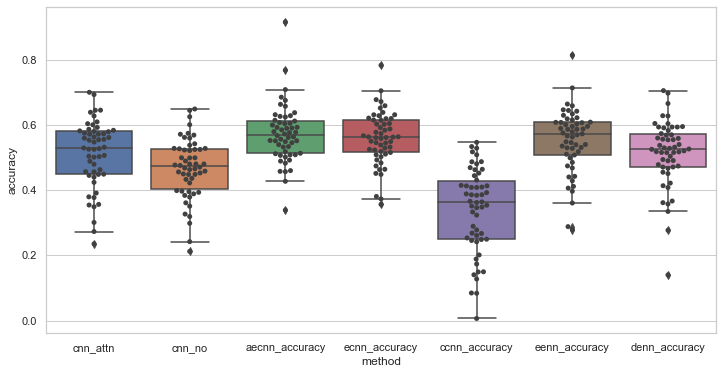

In [135]:
columns_bool = output_df.columns.str.contains("accuracy")
columns_bool
acc_df = output_df.loc[:, columns_bool]
# 最初の7子以外は繰り返しなので無視する
acc_df = acc_df.iloc[:, :7]
acc_df = pd.melt(acc_df, var_name = "methods", value_name="accuracy")
renamed_method = acc_df.apply(lambda s: "_".join(s["methods"].split("_")[1:3]), axis=1)
acc_df = pd.concat([acc_df, renamed_method], axis=1)
acc_df = acc_df.rename(columns={0:"method"})
# acc_df.mean()
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
# sns.catplot(x="method", y="accuracy", data=acc_df, kind="boxen")
# sns.catplot(x="method", y="accuracy", data=acc_df, kind="violin")
sns.boxplot(x="method", y="accuracy", data=acc_df)
# sns.boxplot(x="method", y="accuracy", data=acc_df, hue="method")
sns.swarmplot(x="method", y="accuracy", data=acc_df, color=".25")
plt.savefig("tmp.png")
plt.show()

## ファイル名変更操作（階層を変えながら）

In [16]:
import os
import sys
from glob import glob
import pandas as pd
import shutil

In [40]:
input_dir = os.path.join(os.environ["sleep"], "logs", "cnn_noattn_5stage", "*")

In [41]:
# 対象ディレクトリの下には被験者名をファルダ名とするフォルダしか存在しないため、そのフォルダ名を被験者名としてリストに保存
input_dir_list = glob(input_dir)
name = [os.path.split(__input_dir_list)[1] for __input_dir_list in input_dir_list]
name.__len__()
# input_dir_list
# input_dir_list

54

In [42]:
os.path.split(input_dir_list[0])[0]

'E:\\takadamalab\\sleep_study\\logs\\cnn_noattn_5stage'

In [43]:
for __name, input_dir in zip(name, input_dir_list):
    filepath = os.path.join(input_dir, "ss_5class.csv")
    moved_dir = os.path.split(input_dir)[0]
    moved_path = os.path.join(moved_dir, f"{__name}.csv")
    # print(filepath)
    # print(moved_path)
    shutil.copy(filepath, moved_path)